# **AFRICAN INSTITUTE FOR MATHEMATICAL SCIENCE - RWANDA**

---
# **Big Data Analytics with Python**
## Assignment 2
---

# Answer the following questions and provide a report (2 pages maximum) to them.

### <span style="color:red">Note: More than 2 pages report will be rejected </span>

# **Part 1: Load Rwand House Hold Data**
Please [Download data](https://drive.google.com/file/d/15ztOGriS6uGWMhWeBYdqZs3IwdRi4BJG/view?usp=sharing) and decompress it to <span style="color:blue;">Assignment2/Datasets</span>. After decompressing, you will see the actual size of data is around 3GB. You task is to try to import it in Python using Pandas and PySpark report on the execution times.

Below are some variable definitions:
```python
prov_id = {
    1: "Kigali City",
    2: "Southern Province",
    3: "Western Province",
    4: "Northern Province",
    5: "Eastern Province"
}
```

```python
reg_id = {
    # Kigali City
    11: "Nyarugenge",
    12: "Gasabo",
    13: "Kicukiro",
    14: "Kigali Extra Stratum",
    # Southern Province
    21: "Nyanza",
    22: "Gisagara",
    23: "Nyaruguru",
    24: "Huye",
    25: "Nyamagabe",
    # Western Province
    31: "Karongi",
    32: "Ngororero",
    33: "Rutsiro",
    # Northern Province
    41: "Musanze",
    42: "Burera",
    43: "Gicumbi",
    44: "Rulindo",
    # Eastern Province
    51: "Rwamagana",
    52: "Kayonza",
    53: "Nyagatare",
    54: "Gatsibo"
}
```

[Full data description](https://drive.google.com/file/d/1vlX3zNiNnrhyeS_t1dNeP4sUZl1eOlr-/view?usp=sharing)

In [1]:
import pandas as pd
import pyspark
import time
import numpy as np

In [115]:

path = "../Assignments/hh_data_ml.csv"  
n_runs = 5
pandas_times = []

for i in range(n_runs):
    start_time = time.time()

    df_pd = pd.read_csv(path, sep="|")
    end_time = time.time()
    
    elapsed_time = end_time - start_time
    pandas_times.append(elapsed_time)
    print(f"Run {i+1} time: {elapsed_time:.4f} seconds")

print("-" * 35)
print(f"Raw Times: {pandas_times}")
print(f"Average Load Time: {np.mean(pandas_times):.4f} seconds")
print(f"Pandas DataFrame shape: {df_pd.shape}")

/tmp/ipykernel_55940/1469098274.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pd = pd.read_csv(path, sep="|")


Run 1 time: 28.7390 seconds


/tmp/ipykernel_55940/1469098274.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pd = pd.read_csv(path, sep="|")


Run 2 time: 32.5233 seconds


/tmp/ipykernel_55940/1469098274.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pd = pd.read_csv(path, sep="|")


Run 3 time: 28.2306 seconds


/tmp/ipykernel_55940/1469098274.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pd = pd.read_csv(path, sep="|")


Run 4 time: 30.9439 seconds


/tmp/ipykernel_55940/1469098274.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pd = pd.read_csv(path, sep="|")


Run 5 time: 31.5666 seconds
-----------------------------------
Raw Times: [28.739043712615967, 32.5233154296875, 28.23064136505127, 30.9438796043396, 31.56662106513977]
Average Load Time: 30.4007 seconds
Pandas DataFrame shape: (25674196, 27)


In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Assignment2").getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/11/24 00:44:39 WARN Utils: Your hostname, aimsit, resolves to a loopback address: 127.0.1.1; using 10.6.246.39 instead (on interface wlp0s20f3)
25/11/24 00:44:39 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/24 00:44:39 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
spark

In [51]:
#TODO: use sep="|"

In [3]:
from pyspark.sql import SparkSession


path = "../Assignments/"
n_runs = 5
spark_times = []

for i in range(n_runs):
    start_time = time.time()
    
    df_spark =  spark.read.csv(path + "hh_data_ml.csv", header= True, inferSchema = True, sep = '|')
    
    rows = df_spark.count() 
    end_time = time.time()
    
    elapsed_time = end_time - start_time
    spark_times.append(elapsed_time)
    print(f"Run {i+1} time: {elapsed_time:.4f} seconds")

print("-" * 35)
print(f"Raw Times: {spark_times}")
print(f"Average Load Time: {np.mean(spark_times):.4f} seconds")
print(f"Number of rows: {rows}")
print(f"Number of columns: {len(df_spark.columns)}")

Run 1 time: 8.9504 seconds


Run 2 time: 6.6117 seconds


Run 3 time: 8.9553 seconds


Run 4 time: 8.8651 seconds


Run 5 time: 8.5887 seconds
-----------------------------------
Raw Times: [8.950435161590576, 6.611697673797607, 8.955278635025024, 8.865144968032837, 8.588694334030151]
Average Load Time: 8.3943 seconds
Number of rows: 25674196
Number of columns: 27


In [5]:
df_spark.show()

+---+-------+------+-------+-----+-----------+--------------------+---+---+----+----+---+----------------+-------------+-------------+----------------+--------------------+-----------------+-----------------+--------------------+---+----+---+---+---+---+--------------------+
|_c0|prov_id|reg_id|dist_id| adm4|urban_rural|               hh_id|P03|P05|P07M|P07A|P08|lan_spoken_local|lan_spoken_fr|lan_spoken_en|lan_spoken_other|lan_read_write_local|lan_read_write_fr|lan_read_write_en|lan_read_write_other|P21|P22N|P23|P25|P28|P29|          change_log|
+---+-------+------+-------+-----+-----------+--------------------+---+---+----+----+---+----------------+-------------+-------------+----------------+--------------------+-----------------+-----------------+--------------------+---+----+---+---+---+---+--------------------+
|  0|      1|    11|    111|11101|          1|11101101010011066...|  0|  1|  10|1954| 63|               1|            1|            2|               2|                   1|

25/11/23 19:38:31 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
25/11/23 19:38:31 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , prov_id, reg_id, dist_id, adm4, urban_rural, hh_id, P03, P05, P07M, P07A, P08, lan_spoken_local, lan_spoken_fr, lan_spoken_en, lan_spoken_other, lan_read_write_local, lan_read_write_fr, lan_read_write_en, lan_read_write_other, P21, P22N, P23, P25, P28, P29, change_log
 Schema: _c0, prov_id, reg_id, dist_id, adm4, urban_rural, hh_id, P03, P05, P07M, P07A, P08, lan_spoken_local, lan_spoken_fr, lan_spoken_en, lan_spoken_other, lan_read_write_local, lan_read_write_fr, lan_read_write_en, lan_read_write_other, P21, P22N, P23, P25, P28, P29, change_log
Expected: _c0 but found: 
CSV file: file:///home/guest/Desktop/BigData/V-bigdata/Datasets/Assignments/hh_data_ml.csv


In [6]:
df_spark.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- prov_id: integer (nullable = true)
 |-- reg_id: integer (nullable = true)
 |-- dist_id: integer (nullable = true)
 |-- adm4: integer (nullable = true)
 |-- urban_rural: integer (nullable = true)
 |-- hh_id: decimal(26,0) (nullable = true)
 |-- P03: integer (nullable = true)
 |-- P05: integer (nullable = true)
 |-- P07M: integer (nullable = true)
 |-- P07A: integer (nullable = true)
 |-- P08: string (nullable = true)
 |-- lan_spoken_local: string (nullable = true)
 |-- lan_spoken_fr: string (nullable = true)
 |-- lan_spoken_en: string (nullable = true)
 |-- lan_spoken_other: string (nullable = true)
 |-- lan_read_write_local: string (nullable = true)
 |-- lan_read_write_fr: string (nullable = true)
 |-- lan_read_write_en: string (nullable = true)
 |-- lan_read_write_other: string (nullable = true)
 |-- P21: string (nullable = true)
 |-- P22N: string (nullable = true)
 |-- P23: string (nullable = true)
 |-- P25: string (nullable = true)
 |-- 

In [8]:
df_spark.describe().show()

25/11/23 19:39:09 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , prov_id, reg_id, dist_id, adm4, urban_rural, hh_id, P03, P05, P07M, P07A, P08, lan_spoken_local, lan_spoken_fr, lan_spoken_en, lan_spoken_other, lan_read_write_local, lan_read_write_fr, lan_read_write_en, lan_read_write_other, P21, P22N, P23, P25, P28, P29, change_log
 Schema: _c0, prov_id, reg_id, dist_id, adm4, urban_rural, hh_id, P03, P05, P07M, P07A, P08, lan_spoken_local, lan_spoken_fr, lan_spoken_en, lan_spoken_other, lan_read_write_local, lan_read_write_fr, lan_read_write_en, lan_read_write_other, P21, P22N, P23, P25, P28, P29, change_log
Expected: _c0 but found: 
CSV file: file:///home/guest/Desktop/BigData/V-bigdata/Datasets/Assignments/hh_data_ml.csv


+-------+-----------------+------------------+------------------+------------------+------------------+------------------+--------------------+------------------+------------------+-----------------+-----------------+-----------------+--------------------+------------------+------------------+-------------------+--------------------+------------------+------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+
|summary|              _c0|           prov_id|            reg_id|           dist_id|              adm4|       urban_rural|               hh_id|               P03|               P05|             P07M|             P07A|              P08|    lan_spoken_local|     lan_spoken_fr|     lan_spoken_en|   lan_spoken_other|lan_read_write_local| lan_read_write_fr| lan_read_write_en|lan_read_write_other|               P21|              P22N|               P23|               P25|

# PySpark Exercises: Household Survey Dataset

Using  **PySpark** attempt the following:

### **Q1. Count households by province and urban/rural status**
- How many households are in each province?
- How are they distributed between urban and rural areas

In [9]:
from pyspark.sql import functions as F
from pyspark.sql.functions import countDistinct


hh_by_province2 = (df_spark.groupBy("prov_id").agg(countDistinct("hh_id").alias("household_count")).orderBy("prov_id"))

hh_by_province2.show()


+-------+---------------+
|prov_id|household_count|
+-------+---------------+
|      1|        1716776|
|      2|        1072507|
|      3|         995496|
|      4|         763767|
|      5|         968517|
|      6|         562813|
+-------+---------------+



In [11]:
from pyspark.sql import functions as F

df_spark = df_spark.withColumn("prov_name",
    F.when(F.col("prov_id") == 1, "Kigali City")
     .when(F.col("prov_id") == 2, "Southern Province")
     .when(F.col("prov_id") == 3, "Western Province")
     .when(F.col("prov_id") == 4, "Northern Province")
     .when(F.col("prov_id") == 5, "Eastern Province")
     .otherwise("Unknown Province")
)

hh_by_province = (df_spark.groupBy("prov_id", "prov_name").agg(F.countDistinct("hh_id").alias("household_count")).orderBy("prov_name"))

hh_by_province.show()


+-------+-----------------+---------------+
|prov_id|        prov_name|household_count|
+-------+-----------------+---------------+
|      5| Eastern Province|         968517|
|      1|      Kigali City|        1716776|
|      4|Northern Province|         763767|
|      2|Southern Province|        1072507|
|      6| Unknown Province|         562813|
|      3| Western Province|         995496|
+-------+-----------------+---------------+



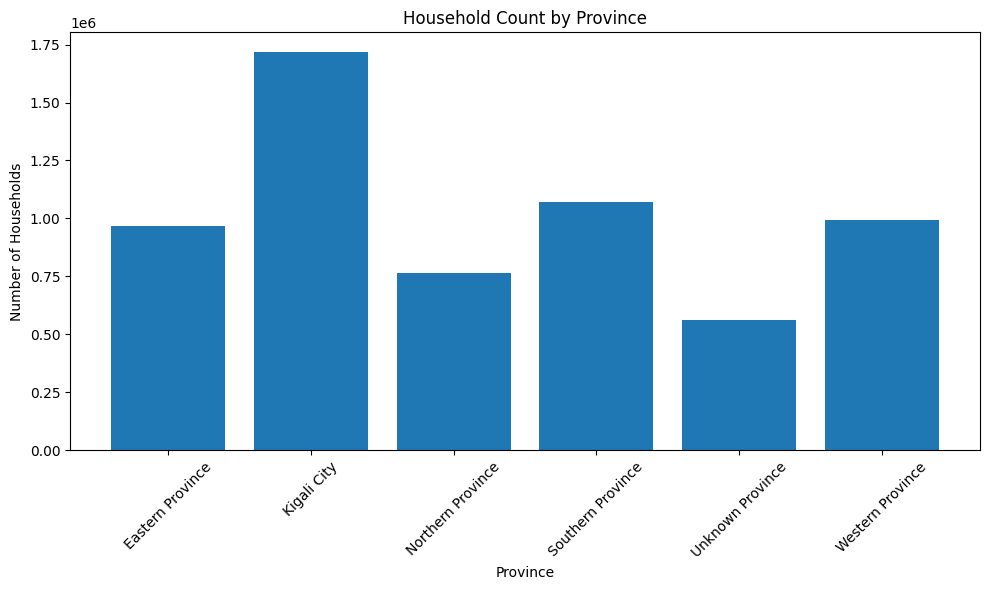

In [13]:
import matplotlib.pyplot as plt

pdf = hh_by_province.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(pdf["prov_name"], pdf["household_count"])

plt.title("Household Count by Province")
plt.xlabel("Province")
plt.ylabel("Number of Households")

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [14]:
hh_by_prov_urban_final = (df_spark.groupBy("prov_id", "prov_name", "urban_rural").agg(F.countDistinct("hh_id").alias("household_count"))
.select("prov_name", "urban_rural", "household_count").orderBy("prov_name", "urban_rural"))

hh_by_prov_urban_final.show()


+-----------------+-----------+---------------+
|        prov_name|urban_rural|household_count|
+-----------------+-----------+---------------+
| Eastern Province|          1|         137336|
| Eastern Province|          2|         831181|
|      Kigali City|          1|         477779|
|      Kigali City|          2|        1238997|
|Northern Province|          1|         158234|
|Northern Province|          2|         605533|
|Southern Province|          1|         144386|
|Southern Province|          2|         928121|
| Unknown Province|          1|         150742|
| Unknown Province|          2|         412071|
| Western Province|          1|         211553|
| Western Province|          2|         783943|
+-----------------+-----------+---------------+



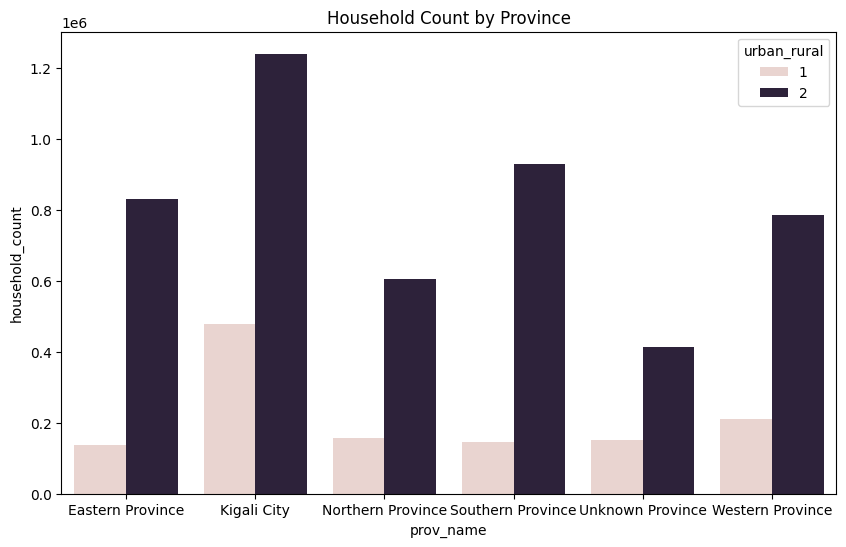

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=hh_by_prov_urban_final.toPandas(), x='prov_name', y='household_count', hue='urban_rural')
plt.title("Household Count by Province")
plt.show()

## **Q2. Average age of household members by province**
- Compute the average age of individuals in each province.

In [16]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DecimalType

data_schema = StructType([
    StructField("_c0", IntegerType(), True),
    StructField("prov_id", IntegerType(), True),
    StructField("reg_id", IntegerType(), True),
    StructField("dist_id", IntegerType(), True),
    StructField("adm4", IntegerType(), True),
    StructField("urban_rural", IntegerType(), True),
    
    StructField("hh_id", DecimalType(26, 0), True),
    StructField("P03", IntegerType(), True),
    StructField("P05", StringType(), True),
    StructField("P07M", IntegerType(), True),
    StructField("P07A", IntegerType(), True),
    StructField("P08", IntegerType(), True),
    StructField("lan_spoken_local", StringType(), True),
    StructField("lan_spoken_fr", StringType(), True),
    StructField("lan_spoken_en", StringType(), True),
    StructField("lan_spoken_other", StringType(), True),
    StructField("lan_read_write_local", StringType(), True),
    StructField("lan_read_write_fr", StringType(), True),
    StructField("lan_read_write_en", StringType(), True),
    StructField("lan_read_write_other", StringType(), True),
    StructField("P21", IntegerType(), True),
    StructField("P22N", StringType(), True),
    StructField("P23", StringType(), True),
    StructField("P25", StringType(), True),
    StructField("P28", StringType(), True),
    StructField("P29", StringType(), True),
    StructField("change_log", StringType(), True)
])

path = ("../Assignments/")
df_spark =  spark.read.csv(path + "hh_data_ml.csv", header= True, schema=data_schema, sep = '|')

df_spark.printSchema()


root
 |-- _c0: integer (nullable = true)
 |-- prov_id: integer (nullable = true)
 |-- reg_id: integer (nullable = true)
 |-- dist_id: integer (nullable = true)
 |-- adm4: integer (nullable = true)
 |-- urban_rural: integer (nullable = true)
 |-- hh_id: decimal(26,0) (nullable = true)
 |-- P03: integer (nullable = true)
 |-- P05: string (nullable = true)
 |-- P07M: integer (nullable = true)
 |-- P07A: integer (nullable = true)
 |-- P08: integer (nullable = true)
 |-- lan_spoken_local: string (nullable = true)
 |-- lan_spoken_fr: string (nullable = true)
 |-- lan_spoken_en: string (nullable = true)
 |-- lan_spoken_other: string (nullable = true)
 |-- lan_read_write_local: string (nullable = true)
 |-- lan_read_write_fr: string (nullable = true)
 |-- lan_read_write_en: string (nullable = true)
 |-- lan_read_write_other: string (nullable = true)
 |-- P21: integer (nullable = true)
 |-- P22N: string (nullable = true)
 |-- P23: string (nullable = true)
 |-- P25: string (nullable = true)
 |--

In [17]:
df_spark = df_spark.withColumn("prov_name",
    F.when(F.col("prov_id") == 1, "Kigali City")
     .when(F.col("prov_id") == 2, "Southern Province")
     .when(F.col("prov_id") == 3, "Western Province")
     .when(F.col("prov_id") == 4, "Northern Province")
     .when(F.col("prov_id") == 5, "Eastern Province")
     .otherwise("Unknown Province")
)

avg_age_by_province = (df_spark.groupBy("prov_name").agg(F.avg("P08").alias("avg_age")).orderBy("prov_name"))

avg_age_by_province.show()


+-----------------+------------------+
|        prov_name|           avg_age|
+-----------------+------------------+
| Eastern Province|20.349793192127727|
|      Kigali City|23.906683571134334|
|Northern Province|21.774495733466285|
|Southern Province|21.262702179926112|
| Unknown Province| 23.46021033623403|
| Western Province|23.092522717228583|
+-----------------+------------------+



### **Q3. Gender distribution per district**
- What is the proportion of males and females in each district (`reg_id`)?

In [18]:
from pyspark.sql.window import Window
from pyspark.sql.types import DoubleType

df_gender_counts = df_spark.groupBy("reg_id").agg(F.sum(F.when(F.col("P05") == 1, 1).otherwise(0)).alias("male_count"),
    F.sum(F.when(F.col("P05") == 2, 1).otherwise(0)).alias("female_count"),F.count("*").alias("total_population") ).withColumnRenamed("reg_id", "district_id")

df_gender_counts.show(5)

+-----------+----------+------------+----------------+
|district_id|male_count|female_count|total_population|
+-----------+----------+------------+----------------+
|         11|   1777869|     1846056|         3623925|
|         12|   1040910|     1038749|         2079659|
|         13|    453468|      445081|          898549|
|         14|    340841|      330152|          670993|
|         21|    714484|      730103|         1444587|
+-----------+----------+------------+----------------+
only showing top 5 rows


In [19]:
df_proportions = df_gender_counts.withColumn("prop_male_pct",(F.col("male_count") / F.col("total_population") * 100).cast(DoubleType())).withColumn("prop_female_pct", 
(F.col("female_count") / F.col("total_population") * 100).cast(DoubleType())).select("district_id","male_count","female_count","total_population",F.format_number("prop_male_pct", 2).
alias("Male_Proportion (%)"),F.format_number("prop_female_pct", 2).alias("Female_Proportion (%)")).orderBy("district_id")

df_proportions.show(10)

+-----------+----------+------------+----------------+-------------------+---------------------+
|district_id|male_count|female_count|total_population|Male_Proportion (%)|Female_Proportion (%)|
+-----------+----------+------------+----------------+-------------------+---------------------+
|         11|   1777869|     1846056|         3623925|              49.06|                50.94|
|         12|   1040910|     1038749|         2079659|              50.05|                49.95|
|         13|    453468|      445081|          898549|              50.47|                49.53|
|         14|    340841|      330152|          670993|              50.80|                49.20|
|         21|    714484|      730103|         1444587|              49.46|                50.54|
|         22|    412492|      424624|          837116|              49.28|                50.72|
|         23|    703779|      736878|         1440657|              48.85|                51.15|
|         24|    207877|      

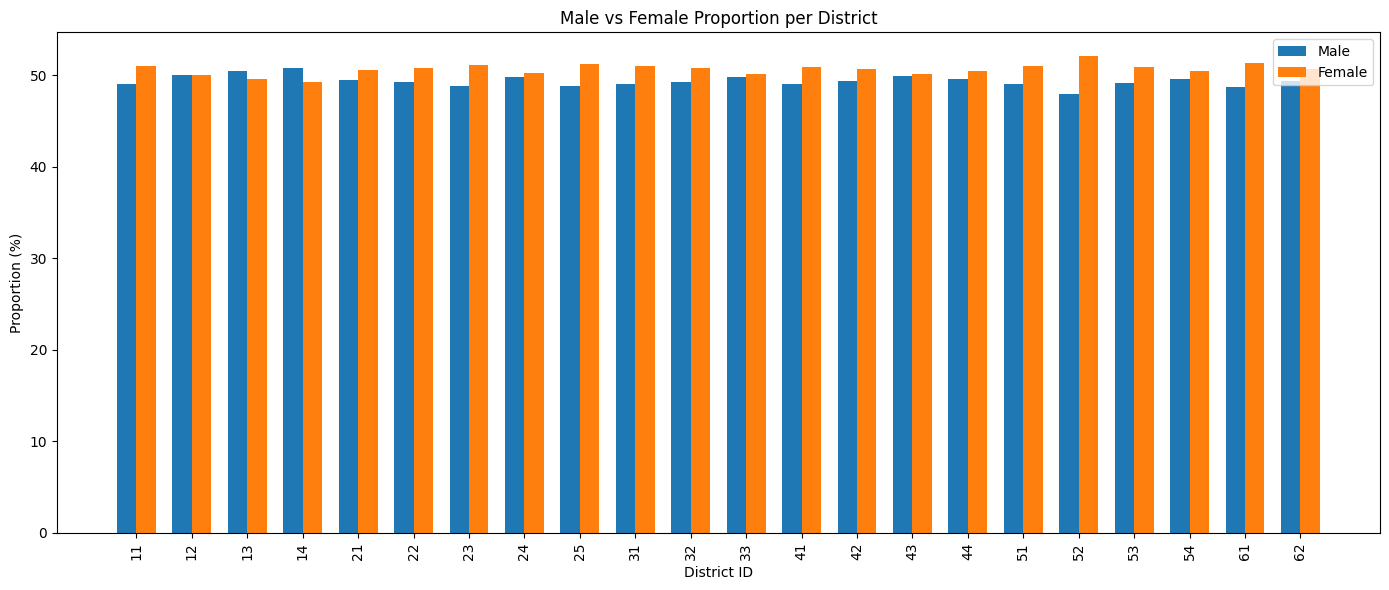

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pdf = df_proportions.toPandas()

x = np.arange(len(pdf))
width = 0.35

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, pdf["Male_Proportion (%)"].astype(float), width, label="Male")
plt.bar(x + width/2, pdf["Female_Proportion (%)"].astype(float), width, label="Female")

plt.xticks(x, pdf["district_id"], rotation=90)
plt.ylabel("Proportion (%)")
plt.xlabel("District ID")
plt.title("Male vs Female Proportion per District")
plt.legend()
plt.tight_layout()
plt.show()



### **Q4. Literacy rates by language**
- What percentage of people can read/write in local language, French, English, and other languages?

In [20]:
total_population = df_spark.count()

lan_cols = [
    "lan_read_write_local",
    "lan_read_write_fr",
    "lan_read_write_en",
    "lan_read_write_other"
]


agg_exprs = [F.sum(F.when(F.col(c) == '1', 1).otherwise(0)).alias(f"{c}_count")for c in lan_cols]

df_literacy_counts = df_spark.agg(*agg_exprs)
df_literacy_counts.show()

+--------------------------+-----------------------+-----------------------+--------------------------+
|lan_read_write_local_count|lan_read_write_fr_count|lan_read_write_en_count|lan_read_write_other_count|
+--------------------------+-----------------------+-----------------------+--------------------------+
|                  16243838|                7108058|                2467926|                    150610|
+--------------------------+-----------------------+-----------------------+--------------------------+



In [21]:
df_literacy_percent = df_literacy_counts

for c in lan_cols:
    df_literacy_percent = df_literacy_percent.withColumn(f"{c}_percent",F.col(f"{c}_count") / total_population * 100)
    
df_literacy_percent.show()


+--------------------------+-----------------------+-----------------------+--------------------------+----------------------------+-------------------------+-------------------------+----------------------------+
|lan_read_write_local_count|lan_read_write_fr_count|lan_read_write_en_count|lan_read_write_other_count|lan_read_write_local_percent|lan_read_write_fr_percent|lan_read_write_en_percent|lan_read_write_other_percent|
+--------------------------+-----------------------+-----------------------+--------------------------+----------------------------+-------------------------+-------------------------+----------------------------+
|                  16243838|                7108058|                2467926|                    150610|           63.26912048190331|        27.68561087560444|        9.612476277738162|          0.5866201223983801|
+--------------------------+-----------------------+-----------------------+--------------------------+----------------------------+------------

In [22]:
import matplotlib.pyplot as plt

pdf = df_literacy_percent.toPandas()
percent_cols = [c for c in pdf.columns if c.endswith("_percent")]
percent_df = pdf[percent_cols]



<Figure size 1400x600 with 0 Axes>

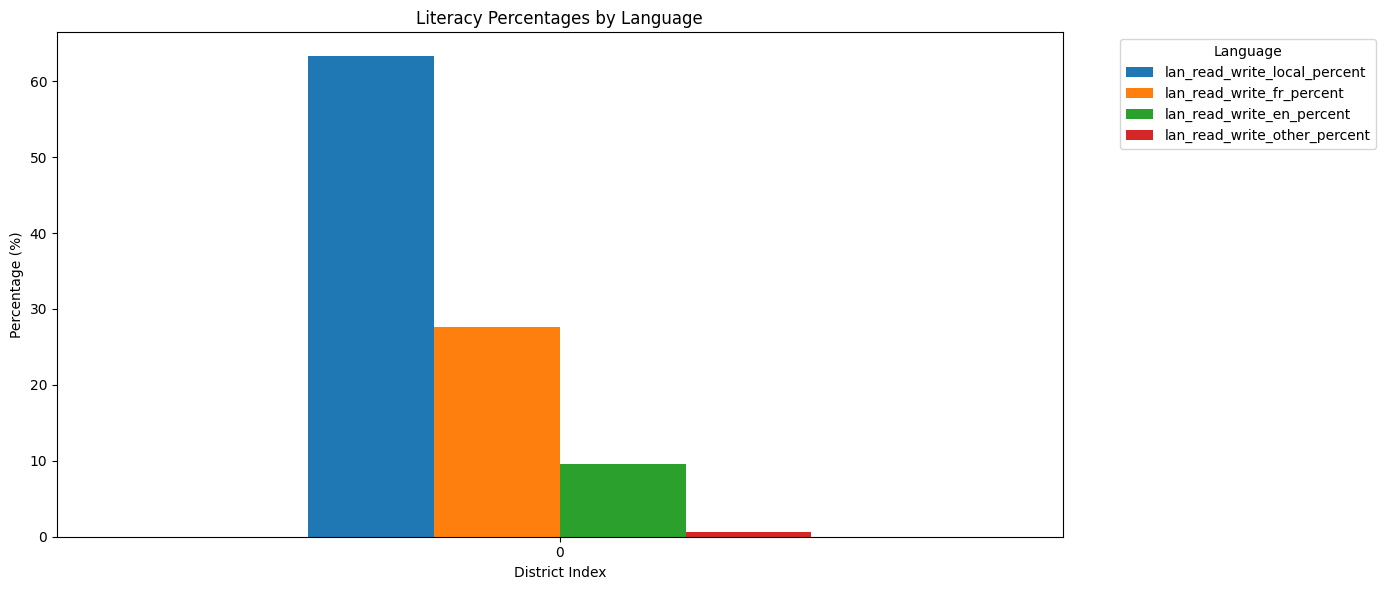

In [23]:
plt.figure(figsize=(14, 6))

percent_df.plot(kind="bar", figsize=(14, 6))

plt.title("Literacy Percentages by Language")
plt.xlabel("District Index")
plt.ylabel("Percentage (%)")

plt.xticks(rotation=0)
plt.legend(title="Language", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


### **Q5. Household size analysis**
- Compute the number of members per household (`hh_id`) and the average household size per province.

In [24]:
from pyspark.sql.window import Window
from pyspark.sql import functions as F 
hh_window = Window.partitionBy("hh_id")

df_with_hh_size = df_spark.withColumn("household_size",F.count("hh_id").over(hh_window))

In [25]:
df_hh_size_per_province = df_with_hh_size.select("prov_name", "hh_id", "household_size").distinct()

avg_hh_size_by_province = (df_hh_size_per_province.groupBy("prov_name").agg(F.count("hh_id").alias("total_households"),F.avg("household_size")
.cast(DoubleType()).alias("avg_household_size")).orderBy("prov_name"))

avg_hh_size_by_province.show()

[1415.954s][warning][gc,alloc] Executor task launch worker for task 2.0 in stage 88.0 (TID 635): Retried waiting for GCLocker too often allocating 18714 words
[1415.956s][warning][gc,alloc] Executor task launch worker for task 13.0 in stage 88.0 (TID 646): Retried waiting for GCLocker too often allocating 5034 words
[1415.956s][warning][gc,alloc] Executor task launch worker for task 5.0 in stage 88.0 (TID 638): Retried waiting for GCLocker too often allocating 9425 words


+-----------------+----------------+------------------+
|        prov_name|total_households|avg_household_size|
+-----------------+----------------+------------------+
| Eastern Province|          968517| 4.336158270840883|
|      Kigali City|         1716776| 4.236502607212589|
|Northern Province|          763767| 4.110055815451571|
|Southern Province|         1072507| 4.820552220171989|
| Unknown Province|          562813| 3.577980608123835|
| Western Province|          995496|3.8960397630929706|
+-----------------+----------------+------------------+



### **Q6. Education level distribution**
- How many people attended each level of education (`P21`) per province?

In [25]:
df_education_distribution = (df_spark.groupBy("prov_name", "P21").agg(F.count("*").alias("person_count")).orderBy("prov_name", "P21"))

df_education_distribution.show()


+-----------------+----+------------+
|        prov_name| P21|person_count|
+-----------------+----+------------+
| Eastern Province|NULL|      384351|
| Eastern Province|   0|     2069594|
| Eastern Province|   1|      909965|
| Eastern Province|   2|      804777|
| Eastern Province|   9|       30956|
|      Kigali City|NULL|      586853|
|      Kigali City|   0|      689510|
|      Kigali City|   1|     4015943|
|      Kigali City|   2|     1926393|
|      Kigali City|   9|       54427|
|Northern Province|NULL|      261276|
|Northern Province|   0|      836068|
|Northern Province|   1|     1244528|
|Northern Province|   2|      763968|
|Northern Province|   9|       33285|
|Southern Province|NULL|      457352|
|Southern Province|   0|     1327405|
|Southern Province|   1|     2021248|
|Southern Province|   2|     1318526|
|Southern Province|   9|       45545|
+-----------------+----+------------+
only showing top 20 rows


In [26]:
pdf = df_education_distribution.toPandas()


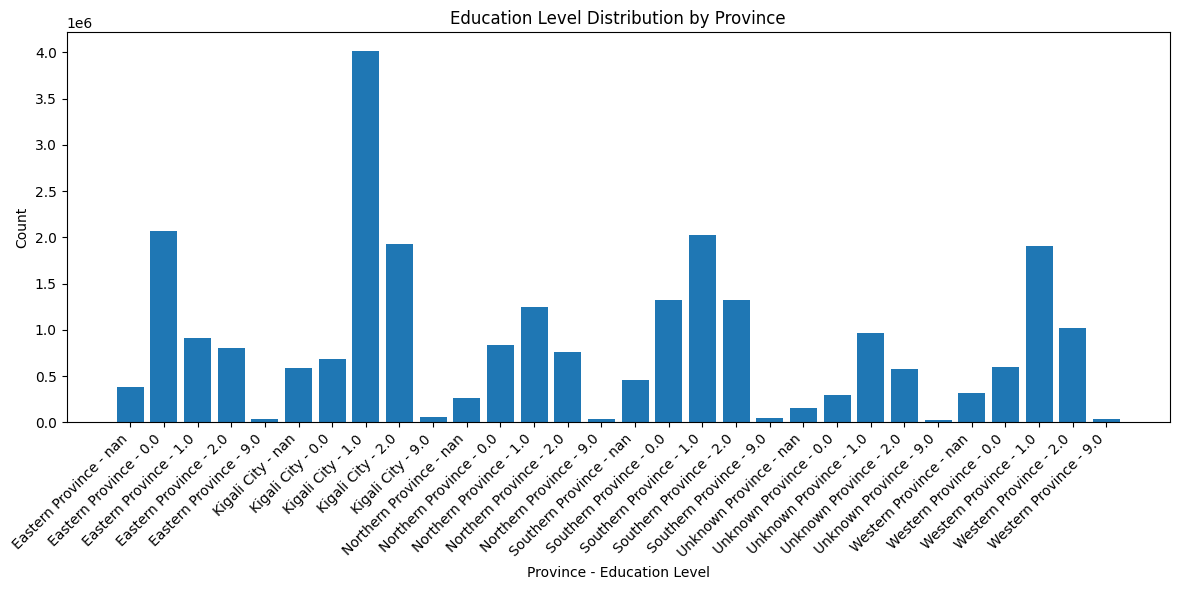

In [27]:
import matplotlib.pyplot as plt

pdf = df_education_distribution.toPandas()

plt.figure(figsize=(12, 6))

labels = pdf["prov_name"].astype(str) + " - " + pdf["P21"].astype(str)

plt.bar(labels, pdf["person_count"])

plt.xticks(rotation=45, ha='right')
plt.title("Education Level Distribution by Province")
plt.xlabel("Province - Education Level")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [28]:
df_spark.select("P21").distinct().show(9)

+----+
| P21|
+----+
|   1|
|   9|
|   2|
|   0|
|NULL|
+----+



### **Q7. Identify households with multilingual members**
- List households where at least one member speaks more than one language.

In [29]:
spoken_lan_cols = [
    "lan_spoken_local",
    "lan_spoken_fr",
    "lan_spoken_en",
    "lan_spoken_other"
]
language_count_expr = sum([F.when(F.col(c) == '1', 1).otherwise(0)
for c in spoken_lan_cols])

df_with_lang_count = df_spark.withColumn("language_count",language_count_expr)

In [30]:
df_multilingual_households = (df_with_lang_count.groupBy("hh_id").agg(F.max("language_count").alias("max_household_lang_count")))

df_result = (df_multilingual_households.filter(F.col("max_household_lang_count") > 1).select("hh_id").distinct().orderBy("hh_id"))


print(f"Total multilingual households found: {df_result.count()}")
df_result.show(20, truncate=False)

Total multilingual households found: 2246889


+--------------------------+
|hh_id                     |
+--------------------------+
|11101101010011066020020002|
|11101101010011066020240024|
|11101101010011066020300030|
|11101101010011066020420042|
|11101101010011066020480048|
|11101101010011066020580058|
|11101101010011066020600060|
|11101101010011066020610061|
|11101101010011066020650065|
|11101101010011066020670067|
|11101101010011066020680068|
|11101101010011066020710071|
|11101101010011066020720072|
|11101101010011066020730073|
|11101101010011066020740074|
|11101101010011066020760076|
|11101101010011066020800080|
|11101101010011066020810081|
|11101101010011066020820082|
|11101101010011066020830083|
+--------------------------+
only showing top 20 rows


### **Q8. Age vs. education correlation**
- Explore the correlation between age (`P08`) and highest level of education (`P21`).

In [31]:
cor_data = df_spark.select("P21","P08")

In [32]:
cor_data.select('P21').distinct().show()

+----+
| P21|
+----+
|   1|
|   9|
|   2|
|   0|
|NULL|
+----+



In [33]:
cor_data.printSchema()

root
 |-- P21: integer (nullable = true)
 |-- P08: integer (nullable = true)



In [34]:
from pyspark.sql.functions import col
# cor_data = cor_data.withColumn("P21", col("P21").cast(IntegerType()))
cor_data = cor_data.withColumn("P08", col("P08").cast(IntegerType()))

In [35]:
cor_data.printSchema()


root
 |-- P21: integer (nullable = true)
 |-- P08: integer (nullable = true)



In [36]:
cor_data.groupBy("P21").agg({"P08": "mean"}).show()


+----+------------------+
| P21|          avg(P08)|
+----+------------------+
|NULL|1.0388852584692048|
|   1|33.100217689305154|
|   9| 13.41757007196281|
|   2|10.869186505676693|
|   0| 22.91744492227016|
+----+------------------+



In [37]:
sampled = cor_data.sample(withReplacement=False, fraction=0.1)  


In [62]:
# import scipy.stats as stats

# groups = [group["P08"].values for name, group in df_spark.groupby("P21")]

# stats.f_oneway(*groups)

In [42]:
from pyspark.sql.functions import col, count, mean, variance

stats_df = cor_data.groupBy("P21").agg(
    count("P08").alias("n"),
    mean("P08").alias("mean_val"),
    variance("P08").alias("var_val")
)

stats_df.show()


+----+--------+------------------+------------------+
| P21|       n|          mean_val|           var_val|
+----+--------+------------------+------------------+
|NULL| 2165345|1.0388852584692048|0.6898459834727841|
|   1|11065771|33.100217689305154|240.57399367469213|
|   9|  226089| 13.41757007196281| 252.7594124617237|
|   2| 6400647|10.869186505676693|21.874227388692464|
|   0| 5815463| 22.91744492227016|372.72744377616146|
+----+--------+------------------+------------------+



In [43]:
stats_pdf = stats_df.toPandas()


In [44]:
import numpy as np

k = len(stats_pdf)
N = stats_pdf["n"].sum()

grand_mean = np.sum(stats_pdf["mean_val"] * stats_pdf["n"]) / N

SSB = np.sum(stats_pdf["n"] * (stats_pdf["mean_val"] - grand_mean)**2)

SSW = np.sum((stats_pdf["n"] - 1) * stats_pdf["var_val"])

df_between = k - 1
df_within = N - k

MSB = SSB / df_between
MSW = SSW / df_within

F_stat = MSB / MSW
F_stat


np.float64(3989872.716901473)

In [45]:
from scipy.stats import f

p_value = 1 - f.cdf(F_stat, df_between, df_within)
p_value


np.float64(1.1102230246251565e-16)

In [46]:
cor_data.groupBy("P21").mean("P08").show()


+----+------------------+
| P21|          avg(P08)|
+----+------------------+
|NULL|1.0388852584692048|
|   1|33.100217689305154|
|   9| 13.41757007196281|
|   2|10.869186505676693|
|   0| 22.91744492227016|
+----+------------------+



### **Q9. Most common occupations per province**
- Find the top 5 occupations (`P29`) in each province.


In [47]:
from pyspark.sql.types import StringType
df_clean = df_spark.withColumn(
    "province",
    F.when(F.trim(F.col("prov_name")) == "", None)
    .otherwise(F.trim(F.col("prov_name")).cast(StringType()))
).withColumn(
    "occupation_code",
    F.when(F.trim(F.col("P29")) == "", None)
    .otherwise(F.trim(F.col("P29")).cast(StringType()))
)

In [48]:
df_spark.select("P29").distinct().show()

+---+
|P29|
+---+
| 51|
| 15|
| 54|
| 11|
| 29|
| 69|
| 42|
| 73|
| 64|
| 30|
| 34|
| 59|
|  8|
| 28|
| 22|
| 85|
| 16|
| 35|
| 52|
| 71|
+---+
only showing top 20 rows


In [49]:
df_filtered = df_clean.dropna(subset=["province", "occupation_code"])

In [50]:

df_counts = df_filtered.groupBy("province", "occupation_code").count()
df_counts = df_counts.withColumnRenamed("count", "n_count")
df_counts.show()

+-----------+---------------+-------+
|   province|occupation_code|n_count|
+-----------+---------------+-------+
|Kigali City|             27|  89238|
|Kigali City|             32|  26585|
|Kigali City|             71|      5|
|Kigali City|             15|  62248|
|Kigali City|             49|    591|
|Kigali City|             37|   7355|
|Kigali City|             47|    854|
|Kigali City|             28|  81673|
|Kigali City|             55|    237|
|Kigali City|             65|     44|
|Kigali City|             34|  14482|
|Kigali City|             12|   2563|
|Kigali City|             88|      2|
|Kigali City|             90|      7|
|Kigali City|             51|    301|
|Kigali City|             58|    146|
|Kigali City|             63|     55|
|Kigali City|             66|     31|
|Kigali City|             52|    316|
|Kigali City|             91|      2|
+-----------+---------------+-------+
only showing top 20 rows


In [51]:

window_spec = Window.partitionBy("province").orderBy(F.desc("n_count"))

df_ranked = df_counts.withColumn("rank", F.rank().over(window_spec))

df_top5 = df_ranked.filter(F.col("rank") <= 5)
df_top5.show()

+-----------------+---------------+-------+----+
|         province|occupation_code|n_count|rank|
+-----------------+---------------+-------+----+
| Eastern Province|             20| 248135|   1|
| Eastern Province|             18| 238108|   2|
| Eastern Province|             16| 138443|   3|
| Eastern Province|             15| 131017|   4|
| Eastern Province|             17| 125054|   5|
|      Kigali City|             20| 473557|   1|
|      Kigali City|             18| 387230|   2|
|      Kigali City|             19| 266870|   3|
|      Kigali City|             22| 229332|   4|
|      Kigali City|             21| 211658|   5|
|Northern Province|             20| 209468|   1|
|Northern Province|             18| 195849|   2|
|Northern Province|             16| 109614|   3|
|Northern Province|             19| 107939|   4|
|Northern Province|             17| 102947|   5|
|Southern Province|             20| 354815|   1|
|Southern Province|             18| 310706|   2|
|Southern Province| 

### **10. Data quality check**
- Identify columns with missing or null values.
- Compute the percentage of missing values per column.

In [ ]:
columns = df_spark.columns

total_rows = df_spark.count()
list(columns)
print(total_rows)


25674196


In [ ]:
agg_expressions = []
for c in columns:
    missing_condition = F.when((F.col(c).isNull()) | (F.trim(F.col(c)) == ""), 1).otherwise(0)
    agg_expressions.append(F.sum(missing_condition).alias(c))

df_missing_counts_wide = df_spark.agg(*agg_expressions)

In [ ]:
missing_counts_dict = df_missing_counts_wide.collect()[0].asDict()

missing_data_long = []
for col_name, missing_count in missing_counts_dict.items():
    if missing_count > 0:
        missing_percent = (missing_count / total_rows) * 100
        
        missing_data_long.append({
            "column_name": col_name,
            "missing_count": missing_count,
            "missing_percentage": round(missing_percent, 4)
        })

25/11/23 17:26:48 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , prov_id, reg_id, dist_id, adm4, urban_rural, hh_id, P03, P05, P07M, P07A, P08, lan_spoken_local, lan_spoken_fr, lan_spoken_en, lan_spoken_other, lan_read_write_local, lan_read_write_fr, lan_read_write_en, lan_read_write_other, P21, P22N, P23, P25, P28, P29, change_log
 Schema: _c0, prov_id, reg_id, dist_id, adm4, urban_rural, hh_id, P03, P05, P07M, P07A, P08, lan_spoken_local, lan_spoken_fr, lan_spoken_en, lan_spoken_other, lan_read_write_local, lan_read_write_fr, lan_read_write_en, lan_read_write_other, P21, P22N, P23, P25, P28, P29, change_log
Expected: _c0 but found: 
CSV file: file:///home/guest/Desktop/BigData/V-bigdata/Datasets/Assignments/hh_data_ml.csv


In [ ]:
df_final_summary = spark.createDataFrame(missing_data_long)
df_final_summary.orderBy(F.desc("missing_percentage")).show(truncate=False)

+--------------------+-------------+------------------+
|column_name         |missing_count|missing_percentage|
+--------------------+-------------+------------------+
|P29                 |15332430     |59.7192           |
|P25                 |14444046     |56.259            |
|P28                 |8630213      |33.6143           |
|P22N                |7981271      |31.0867           |
|P23                 |3705803      |14.434            |
|lan_spoken_en       |2166021      |8.4366            |
|lan_spoken_other    |2166030      |8.4366            |
|lan_spoken_fr       |2166013      |8.4365            |
|lan_spoken_local    |2165987      |8.4364            |
|lan_read_write_other|2165489      |8.4345            |
|lan_read_write_local|2165457      |8.4344            |
|lan_read_write_en   |2165471      |8.4344            |
|lan_read_write_fr   |2165466      |8.4344            |
|P21                 |2165345      |8.4339            |
|P08                 |881          |0.0034      

In [111]:
spark.stop()


# **Part 2: Machine Learning**
## Music Genre classification

Have you ever wondered what makes us, humans, able to tell apart two songs of different genres? How we do we inherenly know the difference between a pop song and heavy metal? This type of classifcation may seem easy for us, but it's a very difficult challenge for a computer to do. So the question is, could an automatic genre classifcation model be possible?

We will be classifying songs based on a number of characteristics into a set of 23 electronic genres. This technology could be used by an application like Pandora to recommend songs to users or just create meaningful channels. Super fun!

### Dataset
*beatsdataset.csv*
Each row is an electronic music song. The dataset contains 100 song for each genre among 23 electronic music genres, they were the top (100) songs of their genres on November 2016. The 71 columns are audio features extracted of a two random minutes sample of the file audio. These features have been extracted using pyAudioAnalysis (https://github.com/tyiannak/pyAudioAnalysis).

### Your task
Use a classification algorithm that classifies songs into the 23 genres provided. Test out several different models and select the highest performing one. Also play around with feature selection methods and finally try to make a recommendation to a user.  

For the feature selection aspect of this project, you may need to get a bit creative if you want to select features from a non-tree algorithm. I did not go over this aspect of PySpark intentionally in the previous lectures to give you chance to get used to researching the PySpark documentation page. Here is the link to the Feature Selectors section of the documentation that just might come in handy: https://spark.apache.org/docs/latest/ml-features.html#feature-selectors


### Source
https://www.kaggle.com/caparrini/beatsdataset

In [ ]:
#!pip install kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.9/807.9 kB 651.6 kB/s  0:00:01eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [kagglehub]


In [65]:
import kagglehub

path = kagglehub.dataset_download("caparrini/beatsdataset")

print("Path to dataset files:", path)

/home/guest/anaconda3/envs/bigdataenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/guest/.cache/kagglehub/datasets/caparrini/beatsdataset/versions/1


In [66]:
from pyspark.sql import SparkSession
from pyspark.sql.types import DoubleType
import os

spark = SparkSession.builder.appName("MusicGenreClassifier").getOrCreate()

In [67]:
df = spark.read.csv(path, header=True, inferSchema=True)

print(f"Total rows: {df.count()}")


df.printSchema()

Total rows: 2300
root
 |-- _c0: integer (nullable = true)
 |-- 1-ZCRm: double (nullable = true)
 |-- 2-Energym: double (nullable = true)
 |-- 3-EnergyEntropym: double (nullable = true)
 |-- 4-SpectralCentroidm: double (nullable = true)
 |-- 5-SpectralSpreadm: double (nullable = true)
 |-- 6-SpectralEntropym: double (nullable = true)
 |-- 7-SpectralFluxm: double (nullable = true)
 |-- 8-SpectralRolloffm: double (nullable = true)
 |-- 9-MFCCs1m: double (nullable = true)
 |-- 10-MFCCs2m: double (nullable = true)
 |-- 11-MFCCs3m: double (nullable = true)
 |-- 12-MFCCs4m: double (nullable = true)
 |-- 13-MFCCs5m: double (nullable = true)
 |-- 14-MFCCs6m: double (nullable = true)
 |-- 15-MFCCs7m: double (nullable = true)
 |-- 16-MFCCs8m: double (nullable = true)
 |-- 17-MFCCs9m: double (nullable = true)
 |-- 18-MFCCs10m: double (nullable = true)
 |-- 19-MFCCs11m: double (nullable = true)
 |-- 20-MFCCs12m: double (nullable = true)
 |-- 21-MFCCs13m: double (nullable = true)
 |-- 22-ChromaVecto

In [68]:
df.show(5)

+---+---------------+---------------+----------------+-------------------+-----------------+------------------+----------------+------------------+--------------+-------------+---------------+----------------+---------------+---------------+----------------+---------------+----------------+----------------+-----------------+-----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+-------------------+---------------+---------------+-------------------+----------------------+--------------------+---------------------+------------------+---------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-------------------+-------------------+------

25/11/23 23:28:32 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , 1-ZCRm, 2-Energym, 3-EnergyEntropym, 4-SpectralCentroidm, 5-SpectralSpreadm, 6-SpectralEntropym, 7-SpectralFluxm, 8-SpectralRolloffm, 9-MFCCs1m, 10-MFCCs2m, 11-MFCCs3m, 12-MFCCs4m, 13-MFCCs5m, 14-MFCCs6m, 15-MFCCs7m, 16-MFCCs8m, 17-MFCCs9m, 18-MFCCs10m, 19-MFCCs11m, 20-MFCCs12m, 21-MFCCs13m, 22-ChromaVector1m, 23-ChromaVector2m, 24-ChromaVector3m, 25-ChromaVector4m, 26-ChromaVector5m, 27-ChromaVector6m, 28-ChromaVector7m, 29-ChromaVector8m, 30-ChromaVector9m, 31-ChromaVector10m, 32-ChromaVector11m, 33-ChromaVector12m, 34-ChromaDeviationm, 35-ZCRstd, 36-Energystd, 37-EnergyEntropystd, 38-SpectralCentroidstd, 39-SpectralSpreadstd, 40-SpectralEntropystd, 41-SpectralFluxstd, 42-SpectralRolloffstd, 43-MFCCs1std, 44-MFCCs2std, 45-MFCCs3std, 46-MFCCs4std, 47-MFCCs5std, 48-MFCCs6std, 49-MFCCs7std, 50-MFCCs8std, 51-MFCCs9std, 52-MFCCs10std, 53-MFCCs11std, 54-MFCCs12std, 55-MFCCs13std, 56-ChromaVector1

In [69]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="class", outputCol="label")

genre_indexer_model = indexer.fit(df)
indexed_df = genre_indexer_model.transform(df)

indexed_df.select("class", "label").distinct().orderBy("label").show(23)

+--------------------+-----+
|               class|label|
+--------------------+-----+
|             BigRoom|  0.0|
|              Breaks|  1.0|
|               Dance|  2.0|
|           DeepHouse|  3.0|
|         DrumAndBass|  4.0|
|             Dubstep|  5.0|
|        ElectroHouse|  6.0|
|ElectronicaDowntempo|  7.0|
|           FunkRAndB|  8.0|
|         FutureHouse|  9.0|
|           GlitchHop| 10.0|
|           HardDance| 11.0|
|  HardcoreHardTechno| 12.0|
|              HipHop| 13.0|
|               House| 14.0|
|   IndieDanceNuDisco| 15.0|
|             Minimal| 16.0|
|    ProgressiveHouse| 17.0|
|           PsyTrance| 18.0|
|           ReggaeDub| 19.0|
|           TechHouse| 20.0|
|              Techno| 21.0|
|              Trance| 22.0|
+--------------------+-----+



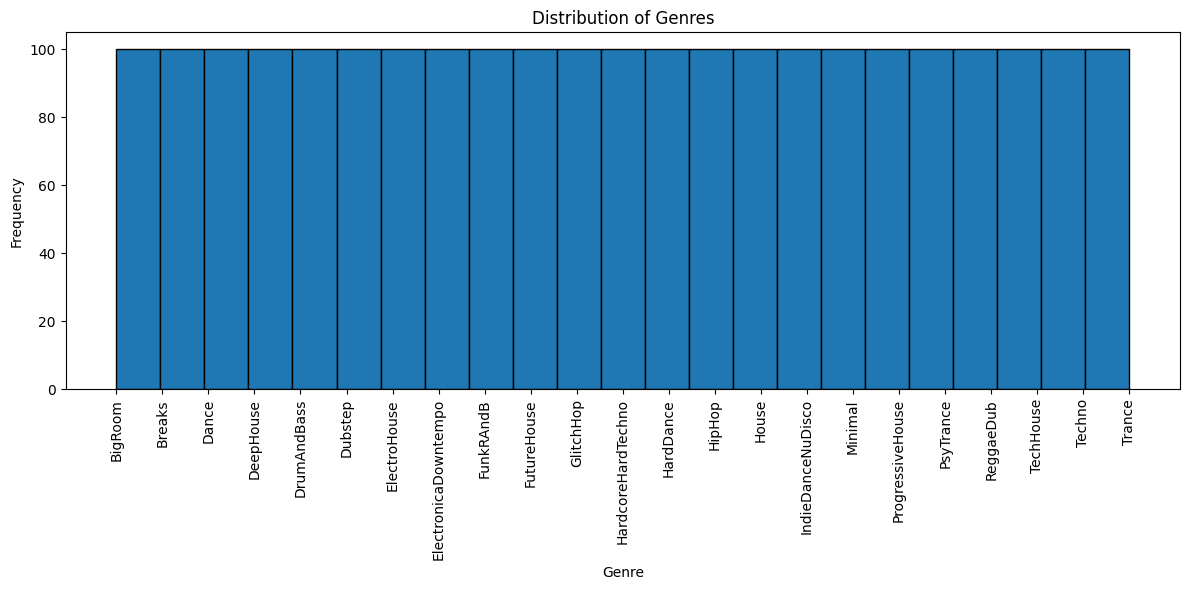

In [70]:
import matplotlib.pyplot as plt

# Convert class column to Pandas
labels = indexed_df.select("class").toPandas()

plt.figure(figsize=(12, 6))
plt.hist(labels["class"], bins=23, edgecolor="black")

plt.title("Distribution of Genres")
plt.xlabel("Genre")
plt.ylabel("Frequency")

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()



In [71]:
from pyspark.ml.feature import *
from pyspark.ml.classification import *
from pyspark.ml.tuning import *
from pyspark.ml.evaluation import *
from pyspark.sql.functions import *
feature_cols = [c for c in indexed_df.columns if c not in ['class', 'label']]

assembler = VectorAssembler(inputCols=feature_cols,outputCol="features")

final_df = assembler.transform(indexed_df)

print(f"Total Features Assembled: {len(feature_cols)}")

final_df.select("label", "features").show(2, truncate=False)

final_df.cache()

Total Features Assembled: 72
+-----+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

25/11/23 23:28:42 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , 1-ZCRm, 2-Energym, 3-EnergyEntropym, 4-SpectralCentroidm, 5-SpectralSpreadm, 6-SpectralEntropym, 7-SpectralFluxm, 8-SpectralRolloffm, 9-MFCCs1m, 10-MFCCs2m, 11-MFCCs3m, 12-MFCCs4m, 13-MFCCs5m, 14-MFCCs6m, 15-MFCCs7m, 16-MFCCs8m, 17-MFCCs9m, 18-MFCCs10m, 19-MFCCs11m, 20-MFCCs12m, 21-MFCCs13m, 22-ChromaVector1m, 23-ChromaVector2m, 24-ChromaVector3m, 25-ChromaVector4m, 26-ChromaVector5m, 27-ChromaVector6m, 28-ChromaVector7m, 29-ChromaVector8m, 30-ChromaVector9m, 31-ChromaVector10m, 32-ChromaVector11m, 33-ChromaVector12m, 34-ChromaDeviationm, 35-ZCRstd, 36-Energystd, 37-EnergyEntropystd, 38-SpectralCentroidstd, 39-SpectralSpreadstd, 40-SpectralEntropystd, 41-SpectralFluxstd, 42-SpectralRolloffstd, 43-MFCCs1std, 44-MFCCs2std, 45-MFCCs3std, 46-MFCCs4std, 47-MFCCs5std, 48-MFCCs6std, 49-MFCCs7std, 50-MFCCs8std, 51-MFCCs9std, 52-MFCCs10std, 53-MFCCs11std, 54-MFCCs12std, 55-MFCCs13std, 56-ChromaVector1

DataFrame[_c0: int, 1-ZCRm: double, 2-Energym: double, 3-EnergyEntropym: double, 4-SpectralCentroidm: double, 5-SpectralSpreadm: double, 6-SpectralEntropym: double, 7-SpectralFluxm: double, 8-SpectralRolloffm: double, 9-MFCCs1m: double, 10-MFCCs2m: double, 11-MFCCs3m: double, 12-MFCCs4m: double, 13-MFCCs5m: double, 14-MFCCs6m: double, 15-MFCCs7m: double, 16-MFCCs8m: double, 17-MFCCs9m: double, 18-MFCCs10m: double, 19-MFCCs11m: double, 20-MFCCs12m: double, 21-MFCCs13m: double, 22-ChromaVector1m: double, 23-ChromaVector2m: double, 24-ChromaVector3m: double, 25-ChromaVector4m: double, 26-ChromaVector5m: double, 27-ChromaVector6m: double, 28-ChromaVector7m: double, 29-ChromaVector8m: double, 30-ChromaVector9m: double, 31-ChromaVector10m: double, 32-ChromaVector11m: double, 33-ChromaVector12m: double, 34-ChromaDeviationm: double, 35-ZCRstd: double, 36-Energystd: double, 37-EnergyEntropystd: double, 38-SpectralCentroidstd: double, 39-SpectralSpreadstd: double, 40-SpectralEntropystd: double, 

## RANDOM FOREST

In [72]:
(training_data, testing_data) = final_df.randomSplit([0.7, 0.3], seed=42)

rf = RandomForestClassifier(labelCol="label", featuresCol="features", seed=42)

paramGrid = ParamGridBuilder().addGrid(rf.maxDepth, [5, 10]).addGrid(rf.numTrees, [20, 50]).build()

evaluator = MulticlassClassificationEvaluator(labelCol="label",predictionCol="prediction",metricName="f1")

cv = CrossValidator(estimator=rf,estimatorParamMaps=paramGrid,evaluator=evaluator,numFolds=3,seed=42)

In [73]:
print(f"Training size: {training_data.count()}")
print(f"Testing size: {testing_data.count()}")

rf_cv_model = cv.fit(training_data)
print("Random Forest Training Complete.")

25/11/23 23:28:48 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , 1-ZCRm, 2-Energym, 3-EnergyEntropym, 4-SpectralCentroidm, 5-SpectralSpreadm, 6-SpectralEntropym, 7-SpectralFluxm, 8-SpectralRolloffm, 9-MFCCs1m, 10-MFCCs2m, 11-MFCCs3m, 12-MFCCs4m, 13-MFCCs5m, 14-MFCCs6m, 15-MFCCs7m, 16-MFCCs8m, 17-MFCCs9m, 18-MFCCs10m, 19-MFCCs11m, 20-MFCCs12m, 21-MFCCs13m, 22-ChromaVector1m, 23-ChromaVector2m, 24-ChromaVector3m, 25-ChromaVector4m, 26-ChromaVector5m, 27-ChromaVector6m, 28-ChromaVector7m, 29-ChromaVector8m, 30-ChromaVector9m, 31-ChromaVector10m, 32-ChromaVector11m, 33-ChromaVector12m, 34-ChromaDeviationm, 35-ZCRstd, 36-Energystd, 37-EnergyEntropystd, 38-SpectralCentroidstd, 39-SpectralSpreadstd, 40-SpectralEntropystd, 41-SpectralFluxstd, 42-SpectralRolloffstd, 43-MFCCs1std, 44-MFCCs2std, 45-MFCCs3std, 46-MFCCs4std, 47-MFCCs5std, 48-MFCCs6std, 49-MFCCs7std, 50-MFCCs8std, 51-MFCCs9std, 52-MFCCs10std, 53-MFCCs11std, 54-MFCCs12std, 55-MFCCs13std, 56-ChromaVector1

Training set size: 1671
Testing set size: 629


25/11/23 23:28:52 WARN DAGScheduler: Broadcasting large task binary with size 1321.1 KiB
25/11/23 23:28:52 WARN DAGScheduler: Broadcasting large task binary with size 1825.9 KiB
25/11/23 23:28:53 WARN DAGScheduler: Broadcasting large task binary with size 2.3 MiB
25/11/23 23:28:53 WARN DAGScheduler: Broadcasting large task binary with size 1966.8 KiB
25/11/23 23:28:54 WARN DAGScheduler: Broadcasting large task binary with size 1263.2 KiB
25/11/23 23:28:54 WARN DAGScheduler: Broadcasting large task binary with size 2019.0 KiB
25/11/23 23:28:55 WARN DAGScheduler: Broadcasting large task binary with size 3.0 MiB
25/11/23 23:28:56 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
25/11/23 23:28:56 WARN DAGScheduler: Broadcasting large task binary with size 5.6 MiB
25/11/23 23:28:57 WARN DAGScheduler: Broadcasting large task binary with size 4.5 MiB
25/11/23 23:29:00 WARN DAGScheduler: Broadcasting large task binary with size 1311.4 KiB
25/11/23 23:29:00 WARN DAGScheduler:

Random Forest Training Complete.


In [74]:
rf_predictions = rf_cv_model.transform(testing_data)
rf_f1 = evaluator.evaluate(rf_predictions)
evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)
rf_accuracy = evaluator_accuracy.evaluate(rf_predictions)

print(f"\n--- Random Forest Results ---")
print(f"Random Forest F1-Score on Test Data: {rf_f1:.4f}")
print(f"Random Forest Accuracy on Test Data: {rf_accuracy:.4f}")

25/11/23 23:29:20 WARN DAGScheduler: Broadcasting large task binary with size 5.8 MiB
25/11/23 23:29:20 WARN DAGScheduler: Broadcasting large task binary with size 5.8 MiB



--- Random Forest Results ---
Random Forest F1-Score on Test Data: 0.8128
Random Forest Accuracy on Test Data: 0.8124


In [83]:
rf = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=20)
rf_model = rf.fit(training_data)
rf_predictions = rf_model.transform(testing_data)

In [84]:
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import numpy as np

In [88]:
predictionAndLabels_rf = rf_predictions.select("prediction", "label").rdd.map(lambda row: (float(row.prediction), float(row.label)))
metrics_rf = MulticlassMetrics(predictionAndLabels_rf)

In [81]:
metrics_rf

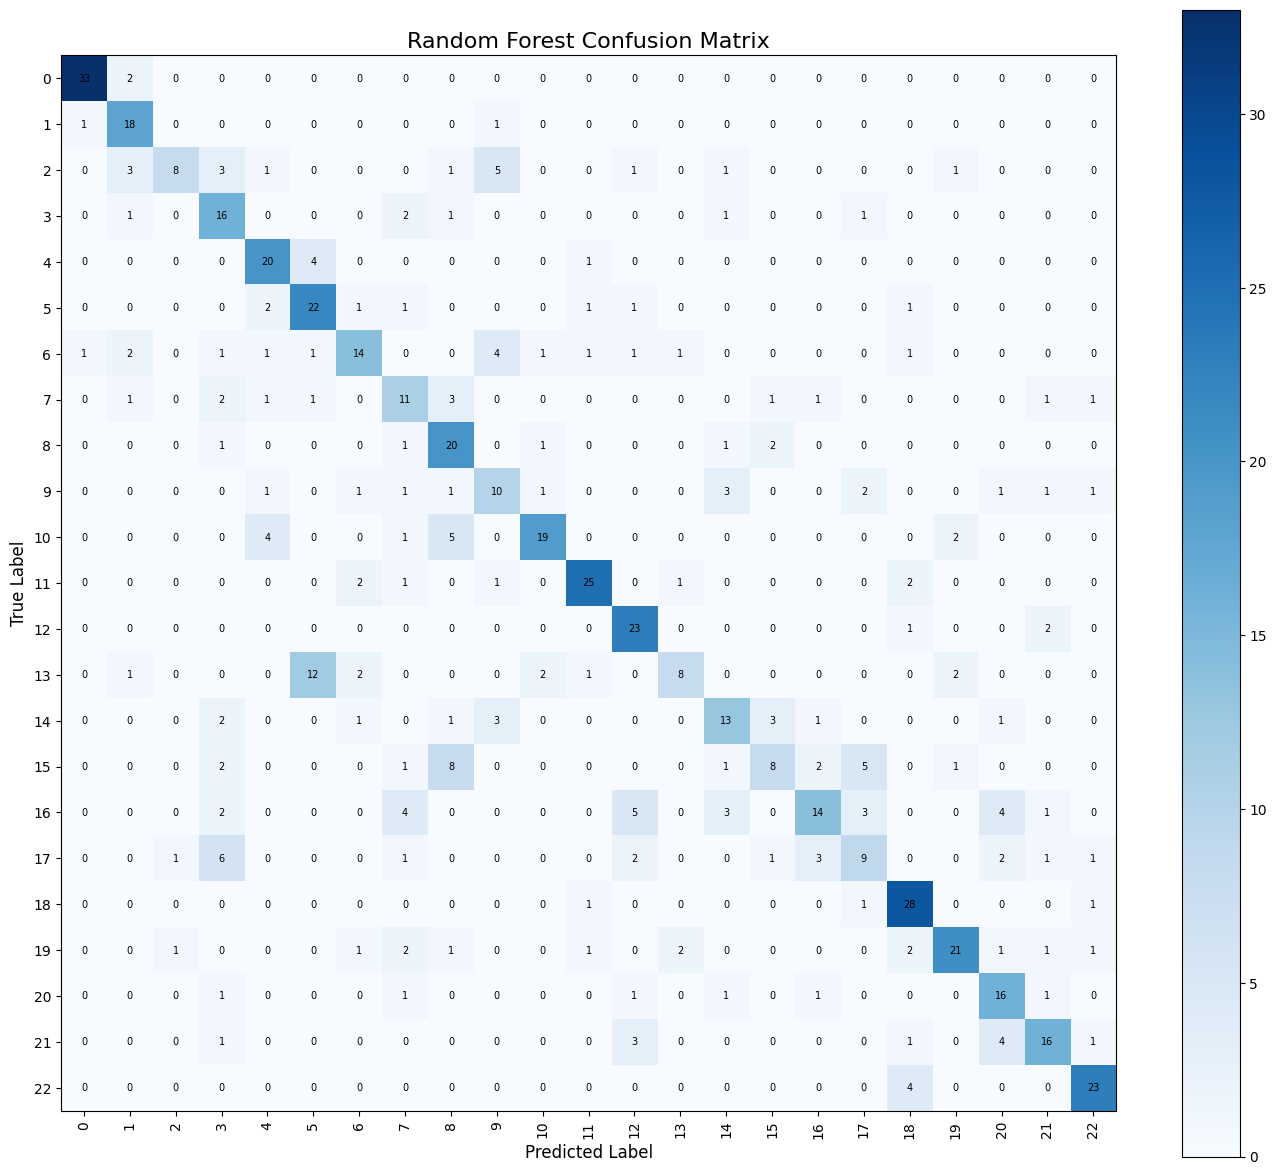

In [89]:
predictionAndLabels_rf = rf_predictions.select("prediction", "label").rdd.map(lambda row: (float(row.prediction), float(row.label)))
metrics_rf = MulticlassMetrics(predictionAndLabels_rf)

cm = metrics_rf.confusionMatrix().toArray()

plt.figure(figsize=(14, 12)) 
plt.imshow(cm, interpolation="nearest", cmap="Blues")
plt.title("Random Forest Confusion Matrix", fontsize=16)
plt.colorbar()

classes = np.arange(cm.shape[0])

plt.xticks(classes, classes) 
plt.yticks(classes, classes)

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, int(cm[i, j]),
                 ha="center", va="center", fontsize=7)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## LOGISTICS

In [90]:
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=10, family="multinomial") # seed=42)

In [91]:
lr_paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5]) \
    .build()

lr_cv = CrossValidator(
    estimator=lr,
    estimatorParamMaps=lr_paramGrid,
    evaluator=evaluator, # Reuse the F1 evaluator
    numFolds=3,
    seed=42
)
print("\nStarting Cross-Validation training for Logistic Regression...")


Starting Cross-Validation training for Logistic Regression...


In [92]:
lr_cv_model = lr_cv.fit(training_data)
print("Logistic Regression Training Complete.")

Logistic Regression Training Complete.


In [93]:
lr_predictions = lr_cv_model.transform(testing_data)
lr_f1 = evaluator.evaluate(lr_predictions)
lr_accuracy = evaluator_accuracy.evaluate(lr_predictions)

print(f"\n--- Logistic Regression Results ---")
print(f"Logistic Regression F1-Score on Test Data: {lr_f1:.4f}")
print(f"Logistic Regression Accuracy on Test Data: {lr_accuracy:.4f}")


--- Logistic Regression Results ---
Logistic Regression F1-Score on Test Data: 0.6407
Logistic Regression Accuracy on Test Data: 0.6455


## Feature Selection

In [94]:
best_rf_model = rf_cv_model.bestModel
importances = best_rf_model.featureImportances.toArray()

In [95]:
feature_cols = [c for c in indexed_df.columns if c not in ['genre_name', 'label']]
importance_df = spark.createDataFrame(zip(feature_cols, importances.tolist()),["Feature", "Importance"])

In [96]:
K = 30
top_k_features = importance_df.orderBy(col("Importance").desc()).limit(K)
top_k_feature_names = [row.Feature for row in top_k_features.collect()]

print(f"\n--- Top {K} Features Selected by Random Forest ---")
top_k_features.show(K, truncate=False)

reduced_feature_cols = top_k_feature_names


--- Top 30 Features Selected by Random Forest ---
+----------------------+--------------------+
|Feature               |Importance          |
+----------------------+--------------------+
|_c0                   |0.195777438081858   |
|71-BPMessentia        |0.07221665439316935 |
|69-BPM                |0.04053183909092673 |
|70-BPMconf            |0.02349796991923109 |
|39-SpectralSpreadstd  |0.021720247714174825|
|43-MFCCs1std          |0.020242999451951387|
|55-MFCCs13std         |0.017712867386483245|
|3-EnergyEntropym      |0.01696002529423387 |
|44-MFCCs2std          |0.016492591086637892|
|38-SpectralCentroidstd|0.016099670516857196|
|9-MFCCs1m             |0.01589840533318275 |
|52-MFCCs10std         |0.014843234308995649|
|10-MFCCs2m            |0.014678730835845897|
|2-Energym             |0.014665472638316086|
|7-SpectralFluxm       |0.013751108090266114|
|41-SpectralFluxstd    |0.013545330548774303|
|48-MFCCs6std          |0.013538463673797104|
|1-ZCRm                |0.013

In [97]:
reduced_assembler = VectorAssembler(inputCols=reduced_feature_cols,outputCol="reduced_features")
reduced_df = reduced_assembler.transform(indexed_df)
reduced_df = reduced_df.drop('features')

reduced_df.cache()
reduced_df.show()
len(reduced_df.columns)

+---+---------------+---------------+----------------+-------------------+-----------------+------------------+----------------+------------------+--------------+--------------+----------------+----------------+-----------------+----------------+-----------------+-----------------+----------------+----------------+-----------------+-----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+-------------------+---------------+---------------+-------------------+----------------------+--------------------+---------------------+------------------+---------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-------------------+------------------

25/11/23 23:34:10 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , 1-ZCRm, 2-Energym, 3-EnergyEntropym, 4-SpectralCentroidm, 5-SpectralSpreadm, 6-SpectralEntropym, 7-SpectralFluxm, 8-SpectralRolloffm, 9-MFCCs1m, 10-MFCCs2m, 11-MFCCs3m, 12-MFCCs4m, 13-MFCCs5m, 14-MFCCs6m, 15-MFCCs7m, 16-MFCCs8m, 17-MFCCs9m, 18-MFCCs10m, 19-MFCCs11m, 20-MFCCs12m, 21-MFCCs13m, 22-ChromaVector1m, 23-ChromaVector2m, 24-ChromaVector3m, 25-ChromaVector4m, 26-ChromaVector5m, 27-ChromaVector6m, 28-ChromaVector7m, 29-ChromaVector8m, 30-ChromaVector9m, 31-ChromaVector10m, 32-ChromaVector11m, 33-ChromaVector12m, 34-ChromaDeviationm, 35-ZCRstd, 36-Energystd, 37-EnergyEntropystd, 38-SpectralCentroidstd, 39-SpectralSpreadstd, 40-SpectralEntropystd, 41-SpectralFluxstd, 42-SpectralRolloffstd, 43-MFCCs1std, 44-MFCCs2std, 45-MFCCs3std, 46-MFCCs4std, 47-MFCCs5std, 48-MFCCs6std, 49-MFCCs7std, 50-MFCCs8std, 51-MFCCs9std, 52-MFCCs10std, 53-MFCCs11std, 54-MFCCs12std, 55-MFCCs13std, 56-ChromaVector1

75

## Retraining Random Forest with reduced features

In [98]:
(reduced_training_df, reduced_testing_df) = reduced_df.randomSplit([0.7, 0.3], seed=42)

print(f"\nTraining set size (Reduced Features): {reduced_training_df.count()}")
print(f"Testing set size (Reduced Features): {reduced_testing_df.count()}")



Training set size (Reduced Features): 1671
Testing set size (Reduced Features): 629


In [99]:
rf_reduced = RandomForestClassifier(labelCol="label",featuresCol="reduced_features", seed=42)

In [ ]:
rf_reduced_cv = CrossValidator(estimator=rf_reduced,estimatorParamMaps=paramGrid, evaluator=evaluator,numFolds=3,seed=42)
print("\nStarting CV training for Random Forest with Reduced Features...")
rf_reduced_cv_model = rf_reduced_cv.fit(reduced_training_df)
print("Random Forest with Reduced Features Training Complete.")


Starting CV training for Random Forest (Reduced Features)...
Random Forest (Reduced Features) Training Complete.


In [101]:
rf_reduced_predictions = rf_reduced_cv_model.transform(reduced_testing_df)
rf_reduced_f1 = evaluator.evaluate(rf_reduced_predictions)
rf_reduced_accuracy = evaluator_accuracy.evaluate(rf_reduced_predictions)

print(f"\n--- Random Forest with Reduced Features Results ---")
print(f"F1-Score (Reduced): {rf_reduced_f1:.4f}")
print(f"Accuracy (Reduced): {rf_reduced_accuracy:.4f}")


--- Random Forest with Reduced Features Results ---
F1-Score (Reduced): 0.7649
Accuracy (Reduced): 0.7679


## Retraining Logistic Regression with reduced features

In [102]:
lr_reduced = LogisticRegression(labelCol="label",featuresCol="reduced_features", family="multinomial")

In [103]:
lr_reduced_cv = CrossValidator(estimator=lr_reduced,estimatorParamMaps=lr_paramGrid,evaluator=evaluator,numFolds=3,seed=42)
print("\nStarting CV training for Logistic Regression with Reduced Features...")
lr_reduced_cv_model = lr_reduced_cv.fit(reduced_training_df)
print("Logistic Regression with Reduced Features Training Complete.")


Starting CV training for Logistic Regression (Reduced Features)...
Logistic Regression (Reduced Features) Training Complete.


In [107]:
lr_reduced_predictions = lr_reduced_cv_model.transform(reduced_testing_df)
lr_reduced_f1 = evaluator.evaluate(lr_reduced_predictions)
lr_reduced_accuracy = evaluator_accuracy.evaluate(lr_reduced_predictions)

print(f"\n--- Logistic Regression with Reduced Features Results ---")
print(f"F1-Score (Reduced): {lr_reduced_f1:.4f}")
print(f"Accuracy (Reduced): {lr_reduced_accuracy:.4f}")


--- Logistic Regression with Reduced Features Results ---
F1-Score (Reduced): 0.7678
Accuracy (Reduced): 0.7679


/home/guest/anaconda3/envs/bigdataenv/lib/python3.12/site-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


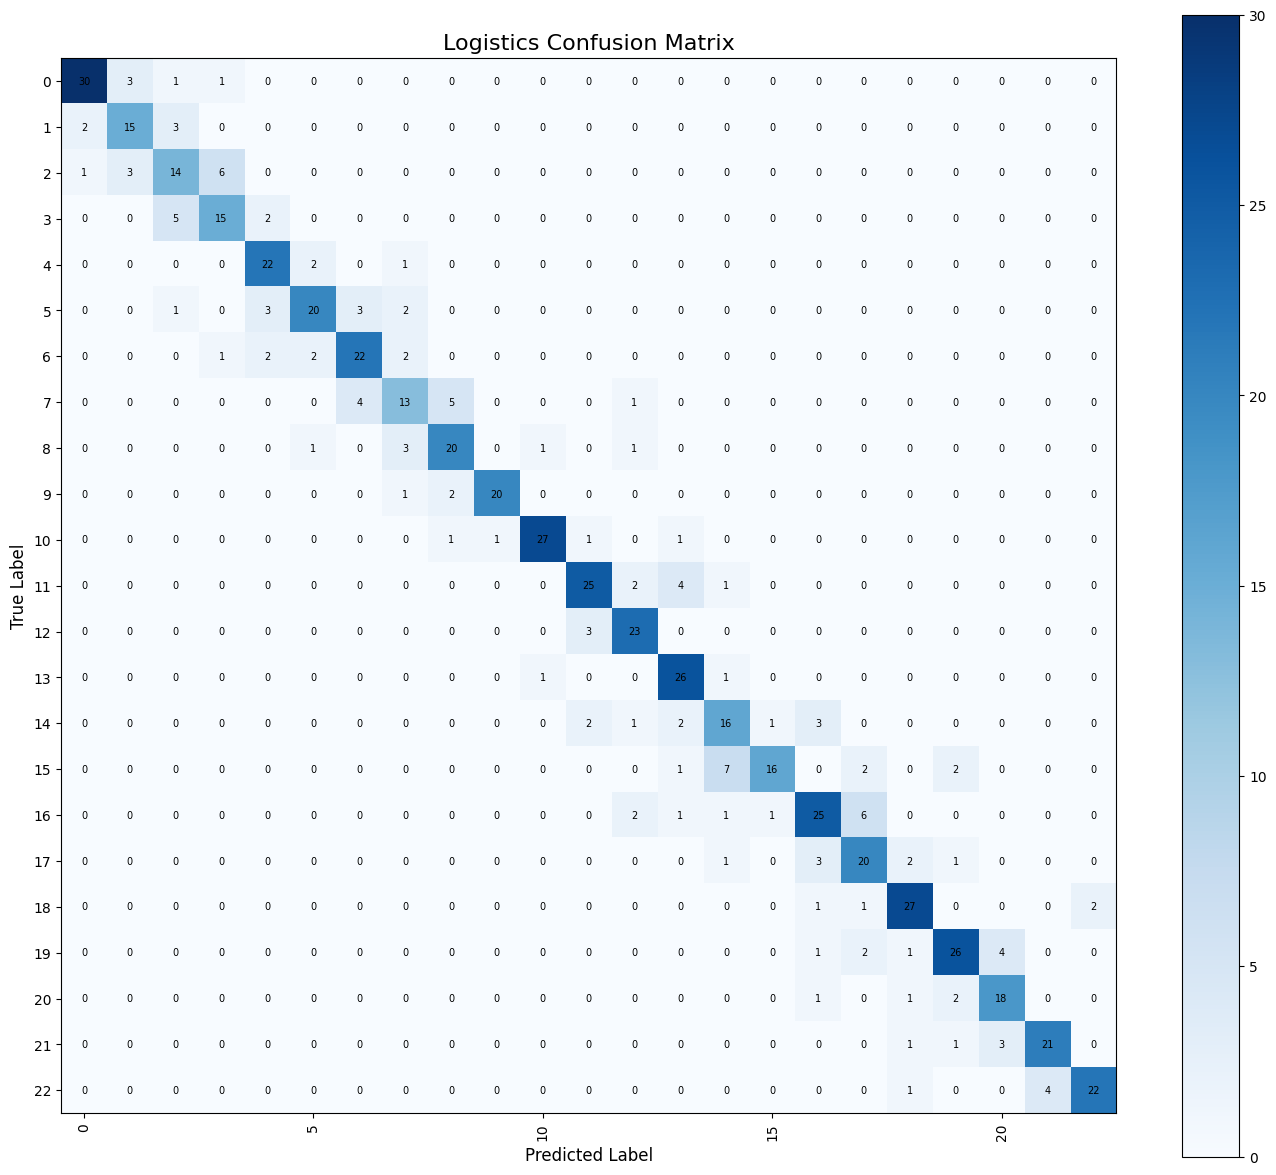

In [109]:
predictionAndLabels_rf = lr_reduced_predictions.select("prediction", "label").rdd.map(lambda row: (float(row.prediction), float(row.label)))
metrics_rf = MulticlassMetrics(predictionAndLabels_rf)

cm = metrics_rf.confusionMatrix().toArray()

plt.figure(figsize=(14, 12)) 
plt.imshow(cm, interpolation="nearest", cmap="Blues")
plt.title("Logistics Confusion Matrix", fontsize=16)
plt.colorbar()

classes = np.arange(cm.shape[0])

plt.yticks(classes, classes)

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, int(cm[i, j]),
                 ha="center", va="center", fontsize=7)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Making a User Recommendation

In [ ]:
new_song_df = testing_df.limit(1).select("features")
prediction_df = rf_cv_model.transform(new_song_df)

In [ ]:
label_converter = IndexToString(inputCol="prediction", outputCol="predicted_genre", labels=genre_indexer_model.labels)

final_recommendation_df = label_converter.transform(prediction_df)


In [ ]:

print("\n--- Recommendation for New Song ---")
final_recommendation_df.select("predicted_genre").show(truncate=False)

predicted_genre_row = final_recommendation_df.select("predicted_genre").collect()[0]
predicted_genre = predicted_genre_row['predicted_genre']


--- Recommendation for New Song ---
+---------------+
|predicted_genre|
+---------------+
|BigRoom        |
+---------------+



25/11/22 19:33:27 WARN DAGScheduler: Broadcasting large task binary with size 5.8 MiB
25/11/22 19:33:27 WARN DAGScheduler: Broadcasting large task binary with size 5.8 MiB
